#                             Social Network Analysis 

## Application of K-Means Clustering in data exploration of Social Network Analysis  

#### What is Clustering?
* Clustering is alternatively called ‘grouping’
* It attaches a label to each observation or data point in a set
* You can say it is kind of an “unsupervised classification”
* The idea behind clustering is: to assign the same label to data points that are “close” to
each other based on the mean of these centroids. However a new centroid is created after data points change clusters. This is repeated until no data point changes cluster. 
* In a cluster, inter-point distances are small compared with the distances to points
outside of the cluster [*]
* Thus, clustering algorithms rely on a distance metric between data points
* Sometimes it is said that for clustering, the distance metric is more important than the
actual clustering algorithm. 

#### To Formulate the SeCo map 

* Delta SSQ (Sum of Squared Errors) is a measure of how well the data points are clustered around the centroid of their assigned cluster in k-means clustering. It is calculated by taking the sum of the squared distances between each data point and its assigned cluster centroid. The lower the Delta SSQ value, the better the clustering results.

* Cramer's V index is a measure of the association between categorical variables. It ranges from 0 to 1, where 0 means no association and 1 means a perfect association. In the context of k-means clustering, Cramer's V can be used to measure the strength of the relationship between the cluster assignments and the categorical variables in the dataset.

For the Task, google colab was used 

In [142]:
import pandas as pd 
import numpy as np  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from joblib import Parallel, delayed
import multiprocessing
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [154]:
import os
from google.colab import drive

Mount Google Drive.
drive.mount('/content/drive')


#df = pd.read_csv('snsdata.csv')
#new_df = pd.read_csv('sns_preprecossed.csv')

Word Count using Kmeans Clustering algorithms 

In [81]:
df.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [105]:
# Function to print various info of DataFrame: e.g., .info(), .shape, Null count of various columns in the DataFrame
def print_various_data_info(df_data):
    #DataFrame.info() method prints information about a DataFrame including the index, dtype & columns, 
    #          count of non-null values. This will indicate the column(s) having null values.
    print('Various Info about Data: \n')
    df_data.info()
    print('\n Shape of Data: \n', df_data.shape)
    print('\n Null ratio for various columns in Data: \n', df_data.isna().sum() /df_data.shape[0])
    
print_various_data_info(df)

Various Info about Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18 

* Data of 30,000 users that mention the keywords mentioned in 36 columns and how frequently do they use that word. 
* Gender and age column contains around 9.1% and 17% of null values respectively.

In [97]:
df['age'].describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

* minimum age was 3 years and 86 days old while, the maximum age reported was over 106 years. Outliers can affect K-means dramatically!
* Majority of the data was obtained between 16-18 years old (25%-75%) . 

In [104]:
df['gradyear'].value_counts()

2006    7500
2007    7500
2008    7500
2009    7500
Name: gradyear, dtype: int64

In [9]:
df.keys()

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [109]:
df['gender'].value_counts(dropna = False) / df.shape[0]

F      0.735133
M      0.174067
NaN    0.090800
Name: gender, dtype: float64

* over 73% females reported
* around 10% NaN values in the gender column

In [146]:
cols = new_df.keys().tolist()
for i in cols:
    print( len(new_df[i].unique()))
    print(i ,'\n') #Unique Values in each column 


16
basketball 

13
football 

20
soccer 

17
softball 

13
volleyball 

13
swimming 

10
cheerleading 

16
baseball 

15
tennis 

10
sports 

16
cute 

25
sex 

14
sexy 

10
hot 

11
kissed 

25
dance 

25
band 

11
marching 

27
music 

17
rock 

29
god 

16
church 

19
jesus 

9
bible 

21
hair 

9
dress 

14
blonde 

12
mall 

11
shopping 

9
clothes 

10
hollister 

9
abercrombie 

15
die 

13
death 

9
drunk 

12
drugs 

10
kmeans_3 

10
kmeans_10 



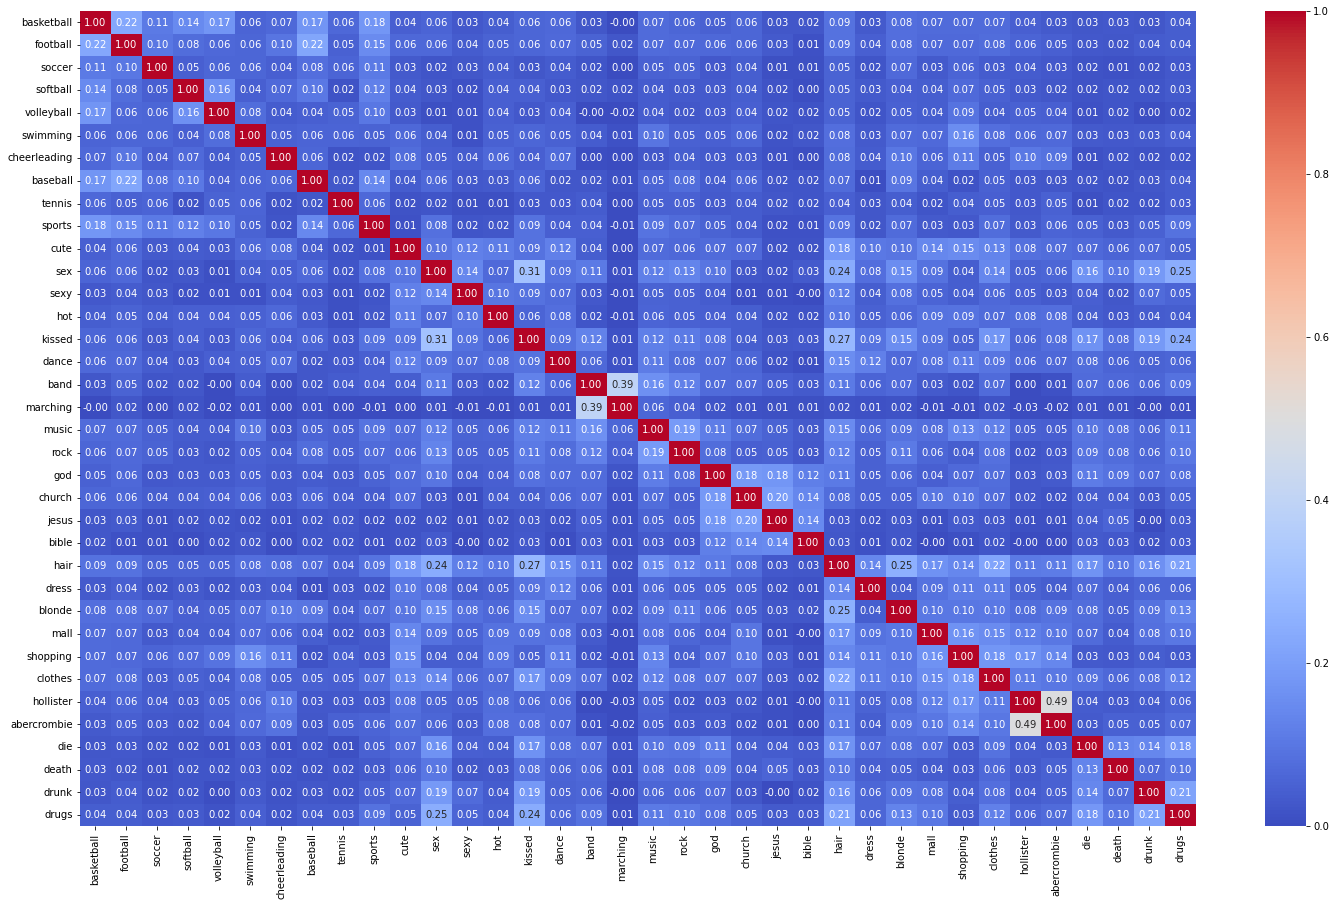

In [155]:
cor = new_df.corr(method = 'kendall')
fig = plt.figure(figsize=(25,15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data = cor, annot = True , cmap ='coolwarm', robust = True , fmt = '0.2f' ) # fmt describe the number of decimal 
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

* The heatmap explains the relationship between columns. However, it doesn't tell us who is interested in what. K-means is expected to give a much more informative answer. 

### Data-Preprocessing 

In [167]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = new_df.copy()
X_scaled = StandardScaler().fit_transform(X)  # Scale data

-----------------------------------------------------------------------------------------------------------------------

### Data Modelling 

In [169]:
k_values = range(2, 20) # Define range of k values to test
print(len([i for i in range(2, 20)]))
print(X_scaled.shape)

# Initialize variables for SeCo map
separation_scores = []
cramer_v_scores = []

18
(30000, 36)


In [170]:
# Model Evaluation using Parallelization
# Perform k-means clustering for each value of k
# for k in k_values:
def k_mean_clustering(k):    
    # Initialize k-means object
    print("k-round - ",k)
    kmeans = KMeans(n_clusters=k, n_init=500, random_state=42)
    print("kmean clus - k-round - ",k)
    # Fit k-means object to data
    kmeans.fit(X_scaled)
    print("kmean fit - k-round - ",k)
    # Calculate within-cluster sum of squares
    wcss = kmeans.inertia_
    # Calculate total sum of squares
    total_ssq = np.sum((X_scaled - np.mean(X_scaled, axis=0))**2)
    separation_score = (total_ssq - wcss) / total_ssq
    separation_scores.append(separation_score)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Calculate Cramer's V index of concordance
    n = len(cluster_labels)
    contingency_table = np.zeros((k, k))
    for i in range(n):
        for j in range(i+1, n):
            contingency_table[cluster_labels[i], cluster_labels[j]] += 1
    contingency_table += contingency_table.T
    expected_table = np.outer(np.sum(contingency_table, axis=1), np.sum(contingency_table, axis=0)) / np.sum(contingency_table)
    chi_squared = np.sum((contingency_table - expected_table)**2 / expected_table)
    cramer_v_score = np.sqrt(chi_squared / (n*(min(k, k)-1)))
    cramer_v_scores.append(cramer_v_score)
    return separation_score, cramer_v_score

In [ ]:
from multiprocessing import Pool
import time
import math

result1 = []
# first way, using multiprocessing
start_time = time.perf_counter()
with Pool() as pool:
    result1 = pool.map(k_mean_clustering, range(2,20))
finish_time = time.perf_counter()
print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))
print("---")
# second way, serial computation
start_time = time.perf_counter()
result = []
for x in range(2,20):
    result.append(k_mean_clustering(x))
finish_time = time.perf_counter()
print("Program finished in {} seconds".format(finish_time-start_time))

In [ ]:
# Get cluster labels and add to original data
new_df['cluster_label'] = best_kmeans.labels_
y_predict=best_kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calculate the Silhouette Score
silhouette = silhouette_score(X_scaled, y_predict)

# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, y_predict)

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, y_predict)

# Print the scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

------------------------------------------------------------------------------------------------------------------------------

## Varied hyper-paramters 

In [ ]:
#import os
#from google.colab import drive

# Mount Google Drive.
#drive.mount('/content/drive')
# Change the current working directory to Google Drive.
#os.chdir('/content/drive/MyDrive/mini project 7022')

# Initialize variables for SeCo map
separation_scores = []
cramer_v_scores = []
k_values = range(2, 14)

In [ ]:
#parallelize the loop using the Pool class from the multiprocessing library:
from multiprocessing import Pool   
# Perform k-means clustering for each value of k
for k in k_values:
    # Initialize k-means object
    kmeans = KMeans(n_clusters=k, n_init=500, random_state=42)
    
    # Fit k-means object to data
    kmeans.fit(X_scaled)
    # Calculate within-cluster sum of squares
    wcss = kmeans.inertia_
    # Calculate total sum of squares
    total_ssq = np.sum((X_scaled - np.mean(X_scaled, axis=0))**2)
    separation_score = (total_ssq - wcss) / total_ssq
    separation_scores.append(separation_score)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate Cramer's V index of concordance
    n = len(cluster_labels)
    contingency_table = np.zeros((k, k))
    for i in range(n):
        for j in range(i+1, n):
            contingency_table[cluster_labels[i], cluster_labels[j]] += 1
    contingency_table += contingency_table.T
    expected_table = np.outer(np.sum(contingency_table, axis=1), np.sum(contingency_table, axis=0)) / np.sum(contingency_table)
    chi_squared = np.sum((contingency_table - expected_table)**2 / expected_table)
    cramer_v_score = np.sqrt(chi_squared / (n*(min(k, k)-1)))
    cramer_v_scores.append(cramer_v_score)
    
if __name__ == '__main__':
 # Define the k values to process 
   k_value = [2, 3, 4, 5, 6]
    
 # Create a pool of worker processes
   pool = Pool()
    
# Process each k value in parallel
def process_k(k):
   pool.map(process_k, k_value)
    
# Close the pool and wait for all processes to finish
pool.close()
pool.join()

In [ ]:
plt.scatter(separation_scores, cramer_v_scores)
plt.xlabel('Separation Score')
plt.ylabel('Cramer\'s V Score')
plt.show()

In [ ]:
# Find k value with highest Cramer's V score
best_k = k_values[np.argmax(cramer_v_scores)]
best_k 

In [ ]:
best_kmeans = KMeans(n_clusters=best_k, n_init=500, random_state=42)
best_kmeans.fit(X_scaled)
# Get cluster labels and add to original data
new_df['cluster_label'] = best_kmeans.labels_
y_predict=best_kmeans.fit_predict(X_scaled)



In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calculate the Silhouette Score
silhouette = silhouette_score(X_scaled, y_predict)

# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, y_predict)

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, y_predict)

# Print the scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

----------------------------------------------------------------------------------------------------------------------------

In [80]:
# Set verbose = 2 for more information, max_iter =100 with centroid fixed for first 
k_means = KMeans(n_clusters = 100, init='k-means++', max_iter = 100, verbose = 2  ) #"greedy k-means++" differs from vanilla k-means++
results = k_means.fit(new_df, sample_weight= )


Initialization complete
Iteration 0, inertia 572083.9094078455.
Iteration 1, inertia 456964.27779880195.
Iteration 2, inertia 443239.35943259223.
Iteration 3, inertia 437264.560243635.
Iteration 4, inertia 432841.96537572244.
Iteration 5, inertia 429690.30212733086.
Iteration 6, inertia 427878.78219196555.
Iteration 7, inertia 427145.26361883315.
Iteration 8, inertia 426622.69394598453.
Iteration 9, inertia 426095.1102430392.
Iteration 10, inertia 425675.4397805979.
Iteration 11, inertia 425286.10065784556.
Iteration 12, inertia 425019.0495527185.
Iteration 13, inertia 424885.781307047.
Iteration 14, inertia 424817.55116221757.
Iteration 15, inertia 424794.79155281896.
Iteration 16, inertia 424768.18523621245.
Iteration 17, inertia 424751.9220801912.
Iteration 18, inertia 424739.03275142296.
Iteration 19, inertia 424719.3169090529.
Iteration 20, inertia 424698.4704933532.
Iteration 21, inertia 424682.1434126041.
Iteration 22, inertia 424673.2775739493.
Iteration 23, inertia 424660.9250

Initialization complete
Iteration 0, inertia 565887.4662990108.
Iteration 1, inertia 457722.38790926797.
Iteration 2, inertia 444318.88470295887.
Iteration 3, inertia 438368.9478312642.
Iteration 4, inertia 434907.8687740593.
Iteration 5, inertia 433064.859800005.
Iteration 6, inertia 432324.8028641377.
Iteration 7, inertia 431994.88511157787.
Iteration 8, inertia 431810.46699315147.
Iteration 9, inertia 431693.9445111391.
Iteration 10, inertia 431600.7426880791.
Iteration 11, inertia 431490.2962112767.
Iteration 12, inertia 431447.0415454131.
Iteration 13, inertia 431419.86662676785.
Iteration 14, inertia 431397.1694247194.
Iteration 15, inertia 431382.9728744952.
Iteration 16, inertia 431370.42040578165.
Iteration 17, inertia 431319.83196939033.
Iteration 18, inertia 431277.58003036876.
Iteration 19, inertia 431263.8599445015.
Iteration 20, inertia 431242.4754455185.
Iteration 21, inertia 431216.7134603006.
Iteration 22, inertia 431194.7765519589.
Iteration 23, inertia 431187.7542001

* Adjusting init='k-means++' refers to readjusting the centroids in a way that aims to spread them out across the data, making it more likely that the algorithm converges to a good solution.
* Inertia is a metric that is used to evaluate the quality of a clustering solution. Inertia measures how far the points within a cluster are from the cluster's centroid or mean. It is defined as the sum of the squared distances between each data point and the centroid of its assigned cluster, and is minimized when the clusters are compact and well-separated.

In [140]:
k_means = KMeans(n_clusters = 10, verbose = 2,  )
results = k_means.fit(new_df)

new_df['kmeans_10'] = results.labels_

Initialization complete
Iteration 0, inertia 1022801.0716965334.
Iteration 1, inertia 902363.4993904186.
Iteration 2, inertia 895329.7630837646.
Iteration 3, inertia 891384.4210285319.
Iteration 4, inertia 887897.7718152094.
Iteration 5, inertia 885222.2171556401.
Iteration 6, inertia 884049.5154437455.
Iteration 7, inertia 883560.8268287538.
Iteration 8, inertia 883197.6055817412.
Iteration 9, inertia 882907.0866728071.
Iteration 10, inertia 882641.8216620429.
Iteration 11, inertia 882420.6690164338.
Iteration 12, inertia 882185.2994044266.
Iteration 13, inertia 881939.740393538.
Iteration 14, inertia 881742.0517156861.
Iteration 15, inertia 881645.8061931828.
Iteration 16, inertia 881528.4741138736.
Iteration 17, inertia 881390.3490759905.
Iteration 18, inertia 881316.2377437911.
Iteration 19, inertia 881307.4693150229.
Iteration 20, inertia 881298.7202019565.
Iteration 21, inertia 881276.2532792048.
Iteration 22, inertia 881194.2907528584.
Iteration 23, inertia 880531.7957876973.
It

Initialization complete
Iteration 0, inertia 1060700.1545895846.
Iteration 1, inertia 914094.5966895022.
Iteration 2, inertia 874034.0873477118.
Iteration 3, inertia 866721.5288954814.
Iteration 4, inertia 864282.4987744665.
Iteration 5, inertia 862285.3637185115.
Iteration 6, inertia 858263.5471708798.
Iteration 7, inertia 853575.3675867402.
Iteration 8, inertia 849552.0463190764.
Iteration 9, inertia 844239.1821879453.
Iteration 10, inertia 841954.1475053458.
Iteration 11, inertia 841825.4089209132.
Iteration 12, inertia 841790.0269711585.
Iteration 13, inertia 841734.0488294831.
Iteration 14, inertia 841614.0558812603.
Iteration 15, inertia 841559.224941085.
Iteration 16, inertia 841559.0253568223.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1075751.379373919.
Iteration 1, inertia 925364.7204398117.
Iteration 2, inertia 893784.0042245521.
Iteration 3, inertia 876516.847392648.
Iteration 4, inertia 868664.8608217074.
Iteration 5, inerti

In [148]:
print( 'Total number of clusters made: \n', len(new_df['kmeans_10'].unique())) # To confirm the number of clusters made 
print( 'Table of frequency of the clusters: \n', new_df['kmeans_10'].value_counts() ) # Table of values 


Total number of clusters made: 
 10
Table of frequency of the clusters: 
 5    19730
8     4359
0     2446
6      921
3      841
1      580
2      460
9      423
7      239
4        1
Name: kmeans_10, dtype: int64


In [157]:
# Setting a strict tolerance 
k_means = KMeans(n_clusters = 7, verbose = 2, tol =  0.00005 )
results = k_means.fit(new_df)
df7 = new_df.copy()
df7['kmeans_7'] = results.labels_

Initialization complete
Iteration 0, inertia 1109760.4214626064.
Iteration 1, inertia 952166.2918933191.
Iteration 2, inertia 936721.893849083.
Iteration 3, inertia 931927.4324893652.
Iteration 4, inertia 928997.7157786511.
Iteration 5, inertia 926706.4339409918.
Iteration 6, inertia 925192.6609148245.
Iteration 7, inertia 924130.0751933546.
Iteration 8, inertia 922386.146013289.
Iteration 9, inertia 920228.578933629.
Iteration 10, inertia 918036.4152284132.
Iteration 11, inertia 916656.1384681847.
Iteration 12, inertia 915451.0521773407.
Iteration 13, inertia 914045.1217792634.
Iteration 14, inertia 912773.5389403417.
Iteration 15, inertia 912025.3343585576.
Iteration 16, inertia 911437.8085648698.
Iteration 17, inertia 910780.2693598468.
Iteration 18, inertia 910360.4458089892.
Iteration 19, inertia 910020.1430642145.
Iteration 20, inertia 909720.9976647731.
Iteration 21, inertia 909475.8832351116.
Iteration 22, inertia 909243.4075664523.
Iteration 23, inertia 909047.3439353635.
Iter

Initialization complete
Iteration 0, inertia 1023370.8138758028.
Iteration 1, inertia 924831.3377439795.
Iteration 2, inertia 913667.8080172567.
Iteration 3, inertia 910113.5625900851.
Iteration 4, inertia 908983.6611747213.
Iteration 5, inertia 908596.6159052112.
Iteration 6, inertia 908348.0091751368.
Iteration 7, inertia 908147.3639960107.
Iteration 8, inertia 907966.0781053879.
Iteration 9, inertia 907666.6353523458.
Iteration 10, inertia 907221.60141985.
Iteration 11, inertia 906514.8182677461.
Iteration 12, inertia 905484.7382516642.
Iteration 13, inertia 904343.251200825.
Iteration 14, inertia 903201.6492731336.
Iteration 15, inertia 902403.7669067001.
Iteration 16, inertia 901960.3752394576.
Iteration 17, inertia 901733.4928594235.
Iteration 18, inertia 901636.8545770053.
Iteration 19, inertia 901585.1721689263.
Iteration 20, inertia 901547.1543596898.
Iteration 21, inertia 901521.3169479812.
Iteration 22, inertia 901511.0777632353.
Iteration 23, inertia 901505.3523119997.
Iter

In [166]:
# !pip install plotly
import plotly.express as px
fig = px.pie(df7, names='kmeans_7', title = 'Population distribuiton of the 7 groups (in %)', opacity = 1)
fig.update_layout(legend=dict(yanchor="top",y=0.45, xanchor="left", x=0.10))
fig.show()

In [152]:
new_df['kmeans_7'].value_counts() / new_df.shape[0]

4    0.675767
2    0.151400
0    0.096833
3    0.031867
1    0.028500
5    0.015600
6    0.000033
Name: kmeans_7, dtype: float64

In [164]:
# Varied hyper parameters. Setting n_init = 1% of data points to consider when making centroids
def optimize_k_means (data, max_k):
    means = []
    inertia = [] # list to collect delta SSQ 
     
    for k in range(1, max_k):
        k_means = KMeans(n_clusters=k, n_init = 300, max_iter  = 1000, verbose = 1 ) #explain the difference between n_init v/s max iterations
        k_means.fit(data)
        inertia.append(k_means.inertia_)
        means.append[k]
        print(inertia)

In [165]:
optimize_k_means(new_df, 9)

Initialization complete
Iteration 0, inertia 4769234.954064366.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1169304.541674224.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1381145.4642798025.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1169304.541674224.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1925066.7178585236.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1971385.2024489273.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1247577.930924098.
Iteration 1, inertia 107996

Initialization complete
Iteration 0, inertia 1738024.4671683032.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5607581.029936569.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1315218.2553185022.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1292572.8688627095.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1173158.5092221336.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1294514.775414119.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1408235.1456929434.
Iteration 1, inertia 1079

Iteration 0, inertia 1297509.2612184894.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1185809.904895049.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1665950.4001613427.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1824517.329562123.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1173158.5092221336.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1582226.9403648712.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3690776.618195412.
Iteration 1, inertia 1079963.9999999935.
Converged

Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2290577.582444866.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1267801.2987605364.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1771682.752891212.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1513343.6627740867.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1824755.2243207765.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1621862.2554219658.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia

Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2314168.4365694574.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2225749.2879078677.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1169304.541674224.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1160206.2187547865.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1284862.9261086779.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2041428.3110821357.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
In

Iteration 0, inertia 1605213.525760734.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1301502.982901031.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1627010.0163548826.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2630162.967805111.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1806775.0270299108.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1378091.0353023026.
Iteration 1, inertia 1079963.9999999935.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1172626.5836208644.
Iteration 1, inertia 1079963.9999999935.
Converged

TypeError: 'builtin_function_or_method' object is not subscriptable

* The k-means algorithm strictly converges due to the local minima although it couldn't find a global minima